# **Practica 6:** RSD

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
# Paqueterias
import numpy as np
import matplotlib.pyplot as plt

## 1 Exercise : Redshift Space Distortions

The idea of this exercise is to apply the Redshift Space Distortions to galaxies from a simulation. You will observe teh distortions on the density field and then compare the power spectra before and after RSD. You will use the file "Data_galaxies_z0695.txt" in which the 7 columns are $x; y; z; v_x; v_y; v_z$; flag. The first 3 are the positions (in Mpc), the 3 next are the velocities according to each axis (in km/s), and the last one is a flag providing information over the type of galaxy (0 if central, 1 if satellite).

#### 1. Read the file to get the positions and velocities of the galaxies and select the central galaxies.

In [2]:
# Importing .txt file data
filename = "/Users/hugor/OneDrive/Escritorio/2/cosmo/Data_galaxies_z0695.txt"
data = np.loadtxt(filename, dtype=float)
# Central and satellite galaxy
flag_arr = data[:,6]
# Selecting central galaxies (flag = 0)
index_central = np.where(flag_arr == 0)
data_central = data[index_central[0],:6]
N_central = data_central.shape[0] # Number of central galaxies is 672274
# Positions central galaxies
x_arr = data_central[:,0]
y_arr = data_central[:,1]
z_arr = data_central[:,2]
# Velocities central galaxies
vx_arr = data_central[:,3]
vy_arr = data_central[:,4]
vz_arr = data_central[:,5]

#### 2. Generate new positions (keep the original ones, you will need it after) applying the RSD according to the $Z$-axis. This is a good approximation when the observer is far away the volume containing the galaxies which the case here knowing the simulation is for a redshift $z = 0.695$. You need to calculate the of $H(z)$ for this redshift, use the somology $\Omega_m = 0.3, \Omega_\Lambda = 0.7$

The RSD can be computed as:

$$
s = r + \frac{v}{aH(a)} = H_0d + \frac{v(1+z)}{H(z)}
$$

where $v = \hat{r}\cdot\vec{v}_i$, being in this case $\hat{r} = \hat{k}$.

And for this cosmology:

$$
H(z) = H_{0}\sqrt{\Omega_m(1+z)^3+\Omega_{\Lambda}}
$$

In [3]:
# Setting cosmology
Omega_m = 0.3
Omega_l = 0.7
# z at which we are computing 
z0 = 0.695
H0 = 70 # km/Mpc/s
# Hubble parameter
def Hubble(z):
    return H0*np.sqrt(Omega_m*(1+ z)**3 + Omega_l)

In [4]:
# Coords. with RSD
xs = np.zeros(N_central)
ys = np.zeros(N_central)
zs = np.zeros(N_central)
# Ajustando las nuevas coords.
for i in range(N_central):
    xs[i] = x_arr[i] 
    ys[i] = y_arr[i] 
    zs[i] = z_arr[i] + vz_arr[i]*((1+z0)/Hubble(z0))

#### 3. Generate the cube of galaxy density with the original positions and another cube of galaxy density using the new positions after applying RSD. Use a pixel size of 5 Mpc (so an array 200 per 200 per 200). Due to the RSD you have to be careful with the new positions en $Z$-axis that can be outside the box. You can remove these galaxies or better move the galaxies at the other side of the cube using periodicity.

In [5]:
# Caracteristicas del grid
# Pixel size 5 Mpc (array 200x200x200)
gridsize = 5
# Size of the grid
L = 200
N_grid = L + 1
vol_box = L**3
vol_pix = gridsize**3
num_galax_tot = N_central
# Normalización del power spectrum
norm_factor = ((5*L)**3)/(N_grid-1)**6
# Creation of the grid
grid_x = np.arange(0,1000, gridsize)
grid_y = np.arange(0,1000, gridsize)
grid_z = np.arange(0,1000, gridsize)

In [6]:
# Computing the galaxy number density with the real positions
density_arr = np.zeros((L,L,L))
for i in range(N_central):
# x-coord    
    x_dist = abs(grid_x - x_arr[i])
    x_min = min(x_dist)
    x_ind = np.where(x_dist == x_min)
    if grid_x[x_ind[0][0]] < x_arr[i]:
        x_dens_ind = x_ind[0][0]
    else:
        x_dens_ind = x_ind[0][0] -1
# y-coord        
    y_dist = abs(grid_y - y_arr[i])
    y_min = min(y_dist)
    y_ind = np.where(y_dist == y_min)
    if grid_y[y_ind[0][0]] < y_arr[i]:
        y_dens_ind = y_ind[0][0]
    else:
        y_dens_ind = y_ind[0][0] -1
#  z-coord   
    z_dist = abs(grid_z - z_arr[i])
    z_min = min(z_dist)
    z_ind = np.where(z_dist == z_min)
    if grid_z[z_ind[0][0]] < z_arr[i]:
        z_dens_ind = z_ind[0][0]
    else:
        z_dens_ind = z_ind[0][0] -1
    density_arr[x_dens_ind,y_dens_ind, z_dens_ind] += 1

In [7]:
# Doing the same for the RSD array case being careful with the new positions in Z-axis that can be outside the box.
density_arrS = np.zeros((L,L,L))
for i in range(N_central):
# x-coord  
    xs_dist = abs(grid_x - xs[i])
    xs_min = min(xs_dist)
    xs_ind = np.where(xs_dist == xs_min)
    if grid_x[xs_ind[0][0]] < xs[i]:
        xs_dens_ind = xs_ind[0][0]
    else:
        xs_dens_ind = xs_ind[0][0] -1
# y-coord     
    ys_dist = abs(grid_y - ys[i])
    ys_min = min(ys_dist)
    ys_ind = np.where(ys_dist == ys_min)
    if grid_y[ys_ind[0][0]] < ys[i]:
        ys_dens_ind = ys_ind[0][0]
    else:
        ys_dens_ind = ys_ind[0][0] -1
# z-coord  
    zs_dist = abs(grid_z - zs[i])
    zs_min = min(zs_dist)
    zs_ind = np.where(zs_dist == zs_min)
    if grid_z[zs_ind[0][0]] < zs[i]:
        zs_dens_ind = zs_ind[0][0]
    else:
        zs_dens_ind = zs_ind[0][0] -1
    density_arrS[xs_dens_ind,ys_dens_ind, zs_dens_ind] += 1

#### 4. Plot a slice at a given position in $X$-axis of the two density cube. (So the coordinates of the slice is $Y$-$Z$). Do you see a difference?

Text(0, 0.5, '$z$')

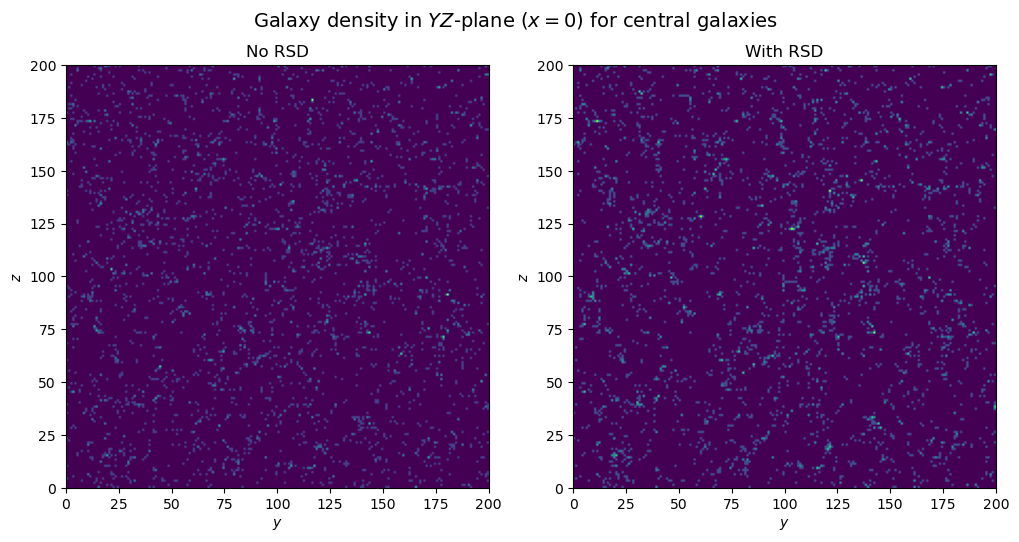

In [8]:
# Plots
# No RSD
plt.figure(figsize=(12, 5.5))
plt.suptitle(r'Galaxy density in $YZ$-plane ($x=0$) for central galaxies', size=14)
plt.subplot(1,2,1)
plt.title(r'No RSD')
plt.imshow(density_arr[0,:,:], cmap='viridis', origin='lower', extent=(0, L, 0, L))
plt.xlabel('$y$')
plt.ylabel('$z$')
# With RSD
plt.subplot(1,2,2)
plt.title(r'With RSD')
plt.imshow(density_arrS[0,:,:], cmap='viridis', origin='lower', extent=(0, L, 0, L))
plt.xlabel('$y$')
plt.ylabel('$z$')

#### 5. Using your code from the second Practica, calculate the Power Spectrum for the two cube of density

In [9]:
# Se calcula el contraste de densidad (delta)
density_med = num_galax_tot/vol_box
delta_arr = density_arr/density_med - 1
delta_arrS = density_arrS/density_med - 1

# Se aplica la TF al contraste de densidad
delta_fourier = np.fft.fftshift(np.fft.fftn(delta_arr))
delta_fourierS = np.fft.fftshift(np.fft.fftn(delta_arrS))

# Create frequency vectors for the x, y and z axes
k_x = np.fft.fftshift(np.fft.fftfreq(L))
k_y = np.fft.fftshift(np.fft.fftfreq(L))
k_z = np.fft.fftshift(np.fft.fftfreq(L))
# k_min y k_max
k_max = (2*(N_grid-1)*np.pi)/(2*(5*L))
k_min = 2*np.pi/(5*L)
# Array de k para el Pk
n_k = L
k_arr = np.sqrt(k_x**2 + k_y**2 + k_z**2)
k_arr_pk = np.linspace(min(k_arr), max(k_arr), n_k)
dk = (max(k_arr)-min(k_arr))/(n_k-1)

In [10]:
# Computing the power spectrum
pre_var = np.zeros(len(k_arr_pk))
pre_varS = np.zeros(len(k_arr_pk))
n_count = np.zeros(len(k_arr_pk))

# For every value in k, we're gonna take the variance of delta(k)
for i in range(len(k_x)):    # Running for every x value in k  
    for j in range(len(k_y)):    # Running for every x value in k in y
        for m in range(len(k_z)): 
            k = ((k_x[i])**2 + (k_y[j])**2 + (k_z[m])**2)**0.5
            index = np.where( (k_arr_pk + dk/2 > k) & (k_arr_pk - dk/2 < k) )   # It tells us which index satisty the prev. condition
            pre_var[index[0]] += np.abs(delta_fourier[i][j][m])**2  # Associates the delta value of certain x,y,z point
            pre_varS[index[0]] += np.abs(delta_fourierS[i][j][m])**2
            n_count[index[0]] += 1  

# The variance is computed just as the sum of pre_var over the number of elements it took
variance_arr = np.zeros(len(pre_var))
variance_arrS = np.zeros(len(pre_varS))
for nn in range(len(pre_var)):
    variance_arr[nn] = pre_var[nn]/n_count[nn]
    variance_arrS[nn] = pre_varS[nn]/n_count[nn]

# Computing el power spectrum
Pk_arr = norm_factor*(1/(2*np.pi)**(3))*variance_arr
Pk_arrS = norm_factor*(1/(2*np.pi)**(3))*variance_arrS

#### 6. Plot on the same figure the 2 Power Spectra you get (in log-log scale)

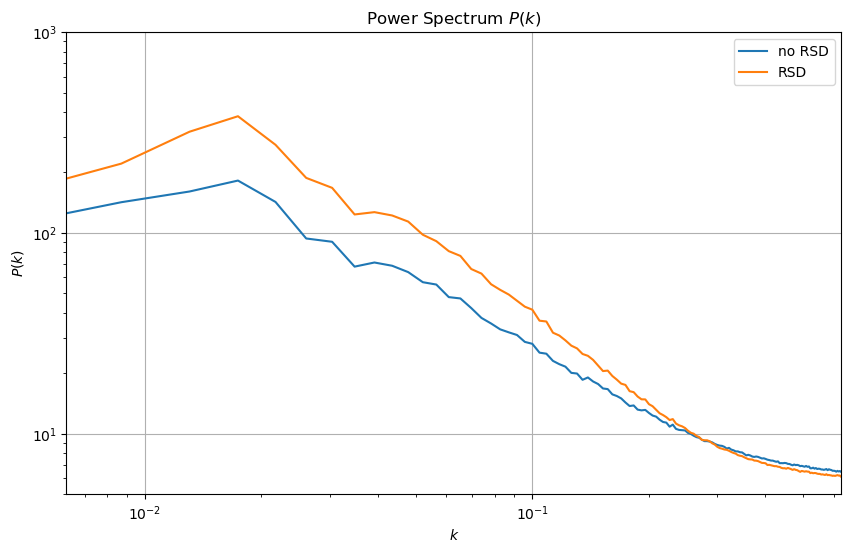

In [11]:
# Ploting both Pk
plt.figure(figsize=(10, 6))
# No RSD
plt.loglog(k_arr_pk,Pk_arr, label=r"no RSD")
# With RSD
plt.loglog(k_arr_pk,Pk_arrS, label=r"RSD")
plt.title('Power Spectrum $P(k)$')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.xlim(k_min, k_max)
plt.ylim(5, 1e3)
plt.legend()
plt.grid(True)
plt.show()

#### 7. The difference between the 2 Power Spectra should be equal to $\frac{P_{RSD}(k)}{P(k)} = 1 + \frac{2}{3}\beta + \frac{1}{5}\beta^2$. The growth factor for the simulation you use is $f = 0.81$ and the bias of the galaxies is $b = 2.1$. Do you find this difference between the 2 Power Spectra?

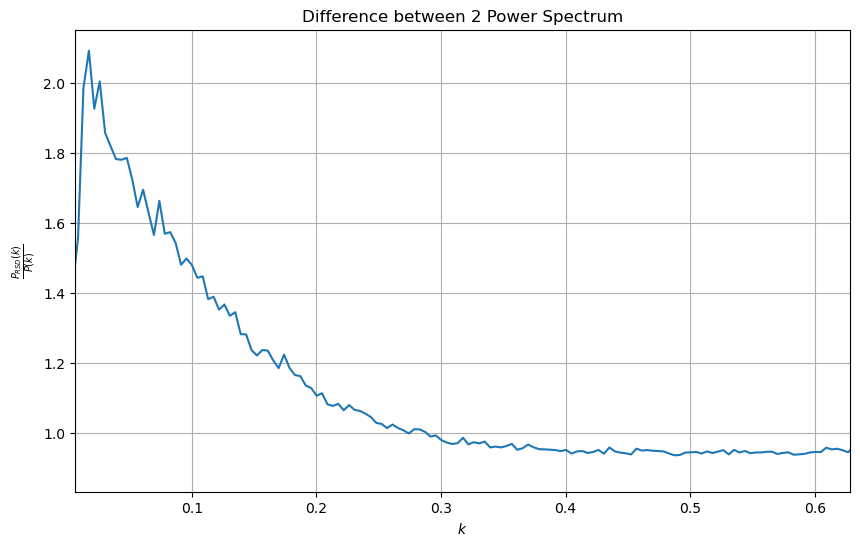

In [12]:
Pk_diff = Pk_arrS/Pk_arr
f = 0.81
b = 2.1
beta = f/b
Pk_diff_teor = 1 + (2/3)*beta + (1/5)*beta**2
# Power spectrum
plt.figure(figsize=(10, 6))
plt.plot(k_arr_pk,Pk_diff)
plt.title('Difference between 2 Power Spectrum')
plt.xlabel("$k$")
plt.ylabel("$\\frac{P_{RSD}(k)}{P(k)}$")
plt.xlim(k_min, k_max)
plt.grid(True)
plt.show()

In [13]:
print(Pk_diff_teor)
print(np.mean(Pk_diff))

1.2868979591836736
1.0871476105205422


#### 8. BONUS: In order to see the Finger of God effect you can redo the galaxy density cubes using the satellite galaxies (flag = 1) and plot the same slice at gien value of X-axis.(as for point 4)

Text(0, 0.5, '$z$')

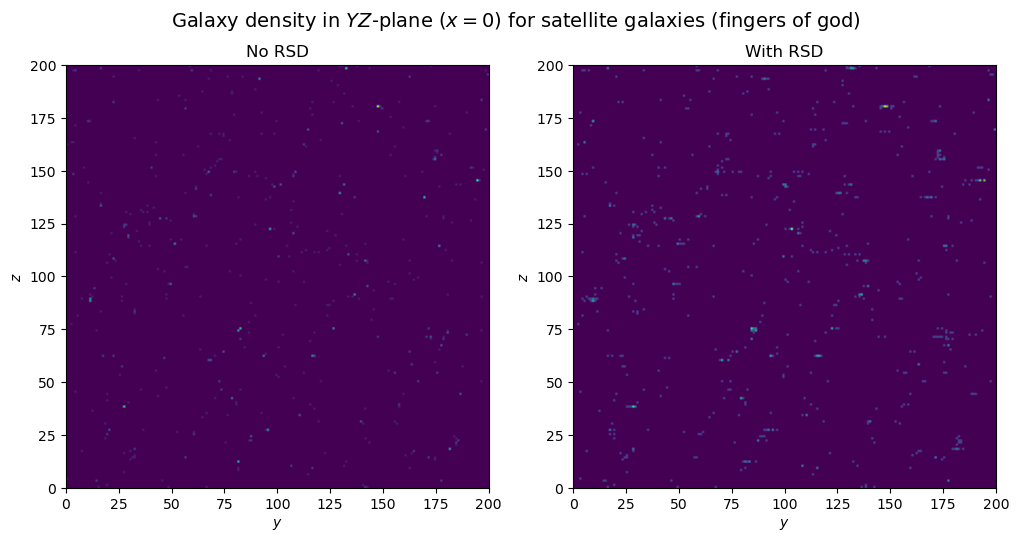

In [14]:
# Selecting satellite galaxies (flag = 1)
index_satellite = np.where(flag_arr == 1)
data_satellite = data[index_satellite[0],:6]
N_satellite = data_satellite.shape[0] # Number of central galaxies is 672274
# Positions satellite galaxies
x_sat = data_satellite[:,0]
y_sat = data_satellite[:,1]
z_sat = data_satellite[:,2]
# Velocities satellite galaxies
vx_sat = data_satellite[:,3]
vy_sat = data_satellite[:,4]
vz_sat = data_satellite[:,5]

# Coords. with RSD for satellite galaxies
xs_sat = np.zeros(N_satellite)
ys_sat = np.zeros(N_satellite)
zs_sat = np.zeros(N_satellite)
# Ajustando las nuevas coords.
for i in range(N_satellite):
    xs_sat[i] = x_sat[i] 
    ys_sat[i] = y_sat[i] 
    zs_sat[i] = z_sat[i] + vz_sat[i]*((1+z0)/Hubble(z0))

# Caracteristicas del grid
num_galax_tot = N_satellite

# Computing the galaxy number density
# Real positions
density_arr_sat = np.zeros((L,L,L))
for i in range(N_satellite):
# x-coord    
    x_dist = abs(grid_x - x_sat[i])
    x_min = min(x_dist)
    x_ind = np.where(x_dist == x_min)
    if grid_x[x_ind[0][0]] < x_sat[i]:
        x_dens_ind = x_ind[0][0]
    else:
        x_dens_ind = x_ind[0][0] -1
# y-coord        
    y_dist = abs(grid_y - y_sat[i])
    y_min = min(y_dist)
    y_ind = np.where(y_dist == y_min)
    if grid_y[y_ind[0][0]] < y_sat[i]:
        y_dens_ind = y_ind[0][0]
    else:
        y_dens_ind = y_ind[0][0] -1
#  z-coord   
    z_dist = abs(grid_z - z_sat[i])
    z_min = min(z_dist)
    z_ind = np.where(z_dist == z_min)
    if grid_z[z_ind[0][0]] < z_sat[i]:
        z_dens_ind = z_ind[0][0]
    else:
        z_dens_ind = z_ind[0][0] -1
    density_arr_sat[x_dens_ind,y_dens_ind, z_dens_ind] += 1

# RSD positions
density_arrS_sat = np.zeros((L,L,L))
for i in range(N_satellite):
# x-coord  
    xs_dist = abs(grid_x - xs_sat[i])
    xs_min = min(xs_dist)
    xs_ind = np.where(xs_dist == xs_min)
    if grid_x[xs_ind[0][0]] < xs_sat[i]:
        xs_dens_ind = xs_ind[0][0]
    else:
        xs_dens_ind = xs_ind[0][0] -1
# y-coord     
    ys_dist = abs(grid_y - ys_sat[i])
    ys_min = min(ys_dist)
    ys_ind = np.where(ys_dist == ys_min)
    if grid_y[ys_ind[0][0]] < ys_sat[i]:
        ys_dens_ind = ys_ind[0][0]
    else:
        ys_dens_ind = ys_ind[0][0] -1
# z-coord  
    zs_dist = abs(grid_z - zs_sat[i])
    zs_min = min(zs_dist)
    zs_ind = np.where(zs_dist == zs_min)
    if grid_z[zs_ind[0][0]] < zs_sat[i]:
        zs_dens_ind = zs_ind[0][0]
    else:
        zs_dens_ind = zs_ind[0][0] -1
    density_arrS_sat[xs_dens_ind,ys_dens_ind, zs_dens_ind] += 1

# Plots for satellite galaxies
# No RSD
plt.figure(figsize=(12, 5.5))
plt.suptitle(r'Galaxy density in $YZ$-plane ($x=0$) for satellite galaxies (fingers of god)', size=14)
plt.subplot(1,2,1)
plt.title(r'No RSD')
plt.imshow(density_arr_sat[0,:,:], cmap='viridis', origin='lower', extent=(0, L, 0, L))
plt.xlabel('$y$')
plt.ylabel('$z$')
# With RSD
plt.subplot(1,2,2)
plt.title(r'With RSD')
plt.imshow(density_arrS_sat[0,:,:], cmap='viridis', origin='lower', extent=(0, L, 0, L))
plt.xlabel('$y$')
plt.ylabel('$z$')